<img src="https://raw.githubusercontent.com/israeldi/quantlab/master/assets/images/Program-Logo.png" width="400px" align="right">

# Financial Data Structures
### [(Go to Quant Lab)](https://israeldi.github.io/quantlab/)

#### Source: Advances in Financial Machine Learning

&copy; MARCOS LOPEZ DE PRADO

<img src="https://raw.githubusercontent.com/israeldi/quantlab/master/assets/images/advances_fin_machine_learning.jpg" width="200px" align="left">

Code and Other work by: [ad1m](https://github.com/ad1m/Financial_Machine_Learning/blob/master/Financial_Data_Structures.ipynb) and [fernandodelacalle](https://github.com/fernandodelacalle/adv-financial-ml-marcos-exercises/tree/master/notebooks)

## Table of Contents

<h4>Introduction:</h4>
<p>In this notebook we learn to work with unstructured financial data and from this to derive a structured dataset for machine learning algorithms. Generally, it is not advisable to consume someone else's preproccessed dataset as the likely outcome will be that you are figuring out what they have already figured out. We want to take an unstructured dataset and process it such that we can find novel informative features.</p>

<h4>Structured V.S. Unstructured Data:</h4>
<p>Structured data is data that you would usually find in a relational database. For instance: phone numbers, Social Security numbers, or ZIP codes. Even text strings of variable length like names are contained in records, making it a simple matter to search. Unstructured Data is data that is in the wild that does not have a concrete structure. For instance, social media text feeds, audio, and images.</p>

<h4>The 4 Types of Financial Data:</h4>
<p>There are four types of financial data:</p>
<ul>
    <li><b>Fundamental Data:</b> Data you can find in regulatory findings such as quarterly reports. For example: Assets, liabilities, sales, costs, and earnings. This data is extremly regularized and low frequency. Since this data is so accessible to the marketplace, it is unlikely that there is much value left to be exploited. However, it can be useful in combination with other data types.</li>
    <li><b>Market Data:</b> Data from all trading activity that takes place in an exchange such as price, volatility, dividends, and volume.</li>
    <li><b>Analytics:</b> Data that has already been proccessed in a particular way such as analyst recommendations, credit ratings, earnings expectations, and news sentiment. This is data that is usually purchased from an alternate vendor.</li>
    <li><b>Alternative Data:</b> Primary information that has not made it yet to other sources such as sattelite images, google searches, and twitter posts. This data is usually more unique and harder to process.</li>
</ul>
<p><b>Note:</b> A dataset might be useful if it annoys the data infrastructure team. Perhaps your competitors did not try to use it for particular reasons or gave up midway.</p>

<h4>Bars:</h4>
<p>The data structures used to contain trading information are often referred to as bars. This is basically a table of data and the rows contain information. These rows are the "bars". These bars can vary greatly in how they were constructed but in general there are two categories of bars:</p>
<ul>
    <li>Standard Bar Methods</li>
    <li>Information-Driven Methods</li>
</ul>

<h4>Standard Bars:</h4>
<p>Standard Bars aim to transform a series of observations that arrive at an irregular frequency into a homogenous series derived from regular sampling. There are 4 main type of standard bars:</p>
<ul>
    <li>Time Bars</li>
    <li>Tick Bars</li>
    <li>Volume Bars</li>
    <li>Dollar Bars</li>
</ul>

<h5>Time Bars:</h5>
<p>Time Bars are obtained by sampling information at a fixed time interval e.g. once every minute. This information usually contains:</p>
<ul>
    <li>Timestamp</li>
    <li>Volume</li>
    <li>VWAP - calculated by adding up the dollars traded for every transaction (price multiplied by number of shares traded) and then dividing by the total shares traded for the day.</li>
    <li>Open</li>
    <li>Close</li>
    <li>High</li>
    <li>Low</li>
</ul>
<p>This is the typical csv data that you will find from yahoo finance for a particular equity. This type of data should be avoided for two reasons:</p>
<ol>
    <li>Markets do not process information at a constant time interval e.g. the hour of the open is more active than the hour around noon. Here time bars oversample information during low-activity periods and undersample information during high-activity periods.</li>
    <li>Time sampled series often exhibit poor statistical properties.</li>
</ol>

<h5>Tick Bars:</h5>
<p>Sample variables such as Timestamp, VWAP, open price, etc. are extracted each time a pre-defined number of transactions takes place.</p>

<p>For instance, every 1000 transactions we take a sample bar. Mandlebrot and Taylor realized that sampling as a function of the number of transactions gives more desirable statistical properties; sampling as a function of trading activity allows us to achieve returns closer to Independant and Identitically Distributed (IID) Normal. Many statistical methods make an assumption that observations are drawn from an IID Gaussian process so this allows us to take advantage of these statistical observations.</p>

<h5>Volume Bars:</h5>
<p>Volume bars sample every time a pre-defined amount of the securitie's units (shares, futures contracts, etc.) have been exchanged. For example, we could sample prices every time a futures contract exchanges 1,000 units, regardless of the number of ticks involved. Volume bars circumvent the following problem that tick bars incur:</p>

<p>Suppose there is one order sitting on the offer for a size of 10. If we buy 10 lots, the order will be recorded as 1 tick. If there are 10 orders of size 1, our 1 buy will be recorded as 10 separate transactions.</p>

<p>Volume bars are preferred over tick bars as sampling by volume gets us closer to an IID Gaussian distribution than sampling by tick bars.</p>

<h5>Dollar Bars:</h5>
<p>Dollar bars are formed by sampling an observation every time a pre-defined market value is exchanged.</p>
<p>The number of shares traded is a function of the actual value exchanged. Thus, it makes sense to sample bars in terms of dollar value exchanged rather than ticks or volume particularly when the analysis involves significant price fluctuations.</p>

<p>Dollar bars are also more interesting than time, tick, or volume bars since the number of outstanding shares often changes multiple times over the course of a securitie's life as a result of corporate actions. Even after adjustment for splits and reverse splits, there are other actions that will impact the amount of ticks and volumes, like issuing new shares or buying back existing shares. Dollar bars tend to be robust in the face of those actions.</p>

___

## Data Preparation

- Download the data from: http://www.kibot.com/buy.aspx at the: "Free historical data for your data quality analysis" section
- We have the data from the WDC stock and the iShares IVE ETF: https://www.ishares.com/us/products/239728/ishares-sp-500-value-etf 

#### Tick Data info from kibot
- http://www.kibot.com/support.aspx#data_format
- The order of the fields in the tick files (with bid/ask prices) is: Date, Time, Price, Bid, Ask, Size. 
- The bid/ask prices are recorded whenever a trade occurs and they represent the "national best bid and offer" (NBBO) prices across multiple exchanges and ECNs.
- For each trade, current best bid/ask values are recorded together with the transaction price and volume. Trade records are not aggregated and all transactions are included in their consecutive order.
- The order of fields in our regular tick files (without bid/ask) is: Date,Time,Price,Size.
- The order of fields in our 1, 5 or 10 second files is: Date,Time,Open,High,Low,Close,Volume. It is the same format used in our minute files.
- The stocks and ETFs data includes pre-market (8:00-9:30 a.m. ET), regular (9:30 a.m.-4:00 p.m. ET.) and after market (4:00-6:30 p.m. ET) sessions.
- Trading for SPY (SPDR S&P 500 ETF) and some other liquid ETFs and stocks usually starts at 4 a.m and ends at 8 p.m. ET.

Initially import all the modules we will be using for our notebook

In [20]:
# Modules for Dataframes
import numpy as np
import pandas as pd 

# Module for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,8

# Here we install these packages in order to use them later in the notebook
import sys
# !{sys.executable} -m pip install statsmodels
# !{sys.executable} -m pip install pyarrow
# !{sys.executable} -m pip install mpl_finance
# !{sys.executable} -m pip install seaborn

# These Modules are for compressing the large data set
import pyarrow as pa
import pyarrow.parquet as pq

import os

# Import our user-written Functions 
import ml_functions as ml

**Create Directories to save results**

In [21]:
# Directory where we will save our plots
directory = "./data"
if not os.path.exists(directory):
    os.makedirs(directory)

directory = "./images"
if not os.path.exists(directory):
    os.makedirs(directory)

We can apply `prepare_data_kibot` function that reformats the column names and the time index. Using `to_parquet` method in order to compress the data. Here we download and save data to the `data` directory.

In [3]:
raw_data_path = 'http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest'
out_data_path = './data/IVE_tickbidask.parq'
ml.prepare_data_kibot(raw_data_path, out_data_path)

KeyboardInterrupt: 

### Data Cleaning
___

In [22]:
#out_data_path = '../data/interim/WDC_tickbidask.parq'
out_data_path = './data/IVE_tickbidask.parq'
df = pd.read_parquet(out_data_path)

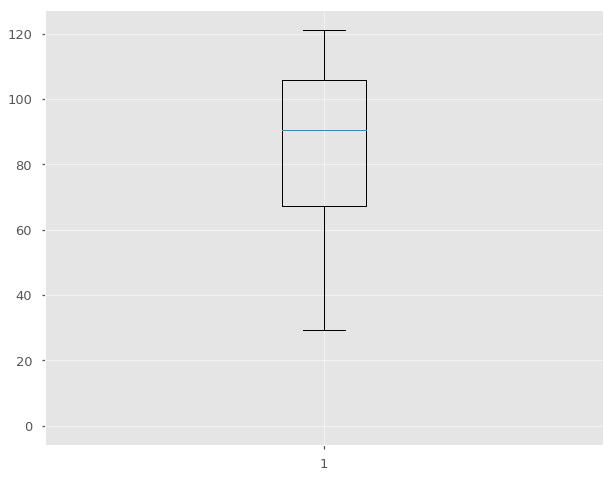

In [23]:
fig, ax = plt.subplots()
_ = ax.boxplot(df.price)
plt.savefig('./images/boxplot_01.png')

In [24]:
mad = ml.mad_outlier(df.price.values)

In [25]:
print(mad.sum())

11


In [26]:
### drop the incorrect rows
df = df.loc[~mad]

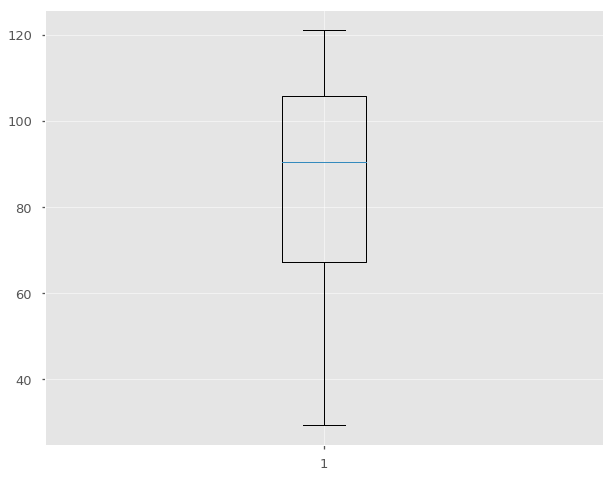

In [27]:
fig, ax = plt.subplots()
_ = ax.boxplot(df.price)
plt.savefig('./images/boxplot_02.png')

In [28]:
#clean_data_path = '../data/processed/clean_WDC_tickbidask.parq'
clean_data_path = './data/clean_IVE_tickbidask.parq'
df.to_parquet(clean_data_path)

### Test clean data loading

In [29]:
# clean_data_path = '../data/processed/WDC_tickbidask.parq'
clean_data_path = './data/clean_IVE_tickbidask.parq'
df = pd.read_parquet(clean_data_path)

In [30]:
df.head()

,price,bid,ask,vol,dollar_vol
date,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,15225.00


## Exercises
#### ([Back to Top](#Table-of-Contents))

**2.1** On a series of E-mini S&P 500 futures tick data:
- **(a)** Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.
- **(b)** Count the number of bars produced by tick, volume, and dollar bars on a
weekly basis. Plot a time series of that bar count. What bar type produces
the most stable weekly count? Why?
- **(c)** Compute the serial correlation of returns for the three bar types. What bar
method has the lowest serial correlation?
- **(d)** Partition the bar series into monthly subsets. Compute the variance of returns
for every subset of every bar type. Compute the variance of those variances.
What method exhibits the smallest variance of variances?
- **(e)** Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

**2.2** On a series of E-mini S&P 500 futures tick data, compute dollar bars
and dollar imbalance bars. What bar type exhibits greater serial correlation?
Why?

**2.3** On dollar bar series of E-mini S&P 500 futures and Eurostoxx 50 futures:
- **(a)** Apply Section 2.4.2 to compute the {$\hat{\omega}_t$} vector used by the ETF trick. (Hint: You will need FX values for EUR/USD at the roll dates.)
- **(b)** Derive the time series of the S&P 500/Eurostoxx 50 spread.
- **(c)** Confirm that the series is stationary, with an ADF test.

**2.4** Form E-mini S&P 500 futures dollar bars:
- **(a)** Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).
- **(b)** Now sample those bars using a CUSUM filter, where {$y_t$} are returns and h = 0.05. How many samples do you get?
- **(c)** Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?

**2.5** Using the bars from exercise 4:
- **(a)** Sample bars using the CUSUM filter, where {$y_t$} are absolute returns and h = 0.05.
- **(b)** Compute the rolling standard deviation of the sampled bars.
- **(c)** Compare this result with the results from exercise 4. What procedure delivered the least heteroscedastic sample? Why?

### Load Data
___

In [31]:
#clean_data_path = '../data/processed/clean_WDC_tickbidask.parq'
clean_data_path = './data/clean_IVE_tickbidask.parq'
df = pd.read_parquet(clean_data_path)

In [32]:
df.head()

,price,bid,ask,vol,dollar_vol
date,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,15225.00


Plot the montly candlestick plot:

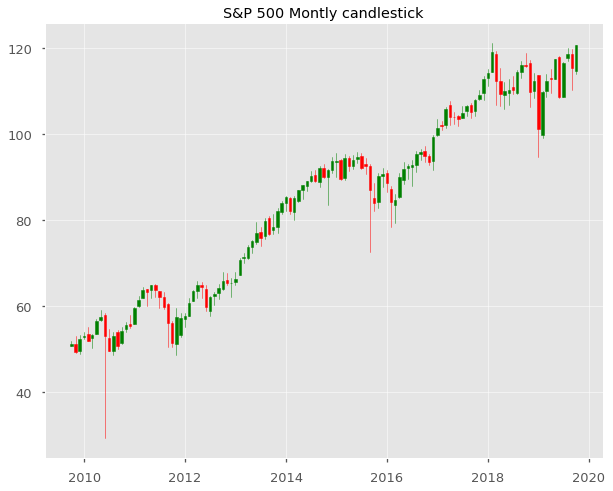

In [34]:
df_ohlc = df.price.resample('1M').ohlc() 

fig, ax = plt.subplots()
ml.plot_candlestick_ohlc(df_ohlc, ax, width=18)
plt.title("S&P 500 Montly candlestick")
plt.savefig('./images/monthly_candlestick.png')

## Solutions

**2.1** On a series of E-mini S&P 500 futures tick data:

**(a)** Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.

In [35]:
minute_df = df.price.resample('min').ohlc().dropna()

m = 10
tick_df = ml.tick_bar(df, m)

m = 1_000
vol_df = ml.volume_bar(df, m)

m = 100_000
dollar_df = ml.dollar_bar(df, m)

In [17]:
print(f"{df.shape} {minute_df.shape} {tick_df.shape} {vol_df.shape} {dollar_df.shape} {tick_df.index[0]}, {tick_df.index[-1]}")

(1651077, 5) (598513, 4) (165108, 5) (470932, 6) (419254, 6) 2009-09-28 09:30:00, 2019-09-11 15:59:59


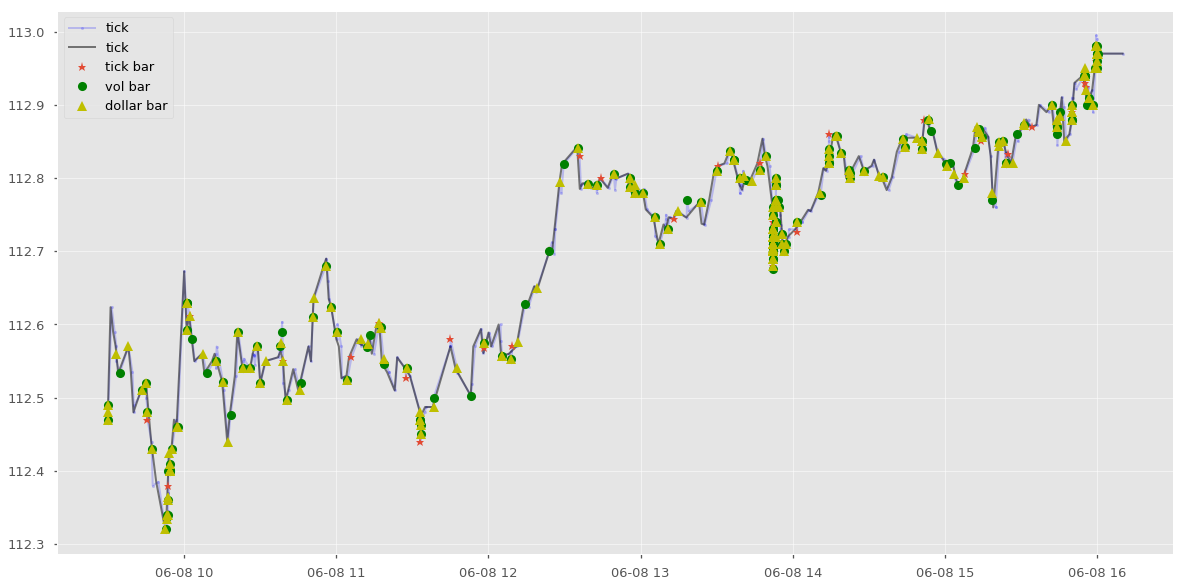

In [50]:
s_date='2018-06-08 8:00:00'
e_date='2018-06-08 17:00:00'
plt.figure(figsize=(20,10))
plt.plot(df.loc[s_date:e_date].price, marker='o', ms=3, color='b', alpha=0.2, label='tick')

plt.plot(minute_df.open.loc[s_date:e_date], marker='x', ms=3, color='k', alpha=0.5, label='tick')

plt.plot(tick_df.loc[s_date:e_date].price, marker='*', ls='', label='tick bar')

plt.plot(vol_df.loc[s_date:e_date].price, marker='o', ls='', color='g', label='vol bar')

plt.plot(dollar_df.loc[s_date:e_date].price, marker='^', ls='', color='y', label='dollar bar')
plt.legend()
plt.savefig('./images/tick_volume_dollar.png')
plt.show()

- **(b)** Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time series of that bar count. What bar type produces the most stable weekly count? Why?

In [51]:
weekly_tick_count = tick_df.price.resample('1W').count()
weekly_vol_count = vol_df.price.resample('1W').count()
weekly_dollar_count = dollar_df.price.resample('1W').count()

In [52]:
count_df = pd.DataFrame(columns=['count_mean','count_std'], index=['tick', 'vol', 'dollar'])
count_df.loc['tick'] = [weekly_tick_count.mean(), weekly_tick_count.std()]
count_df.loc['vol'] = [weekly_vol_count.mean(), weekly_vol_count.std()]
count_df.loc['dollar'] = [weekly_dollar_count.mean(), weekly_dollar_count.std()]
count_df

,count_mean,count_std
tick,317.515,193.028
vol,905.638,532.047
dollar,806.258,556.688


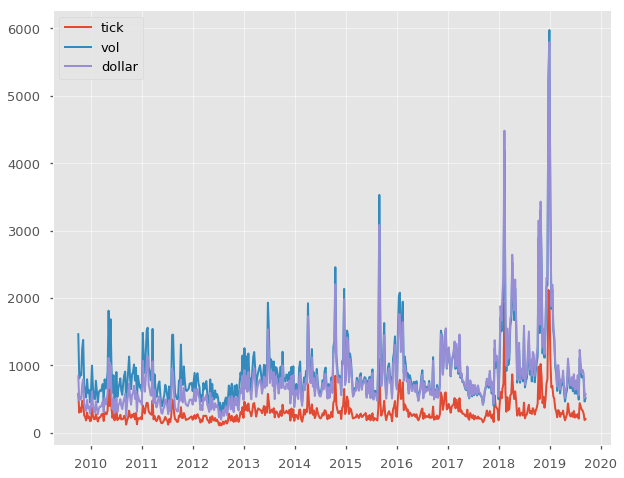

In [53]:
fig, ax = plt.subplots(1)
plt.plot(weekly_tick_count)
plt.plot(weekly_vol_count)
plt.plot(weekly_dollar_count)
ax.legend(["tick", "vol", 'dollar'])
plt.savefig('./images/bar_count_series.png')

In [54]:
def scale(s):
    return (s - s.min()) / (s.max() - s.min())

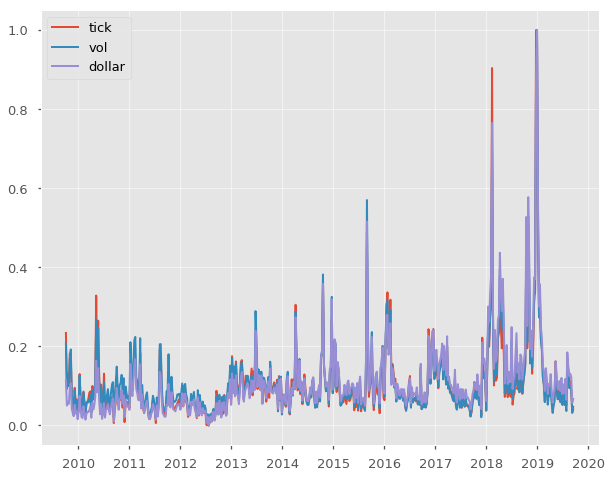

In [55]:
fig, ax = plt.subplots(1)
plt.plot(scale(weekly_tick_count))
plt.plot(scale(weekly_vol_count))
plt.plot(scale(weekly_dollar_count))
ax.legend(["tick", "vol", 'dollar'])
plt.savefig('./images/scaled_bar_series.png')

**(c)** Compute the serial correlation of returns for the three bar types. What bar method has the lowest serial correlation?

In [56]:
# log returns
tick_returns = np.log(tick_df.price).diff().dropna()
vol_returns = np.log(vol_df.price).diff().dropna()
dollar_returns = np.log(dollar_df.price).diff().dropna()

In [57]:
returns_corr_df = pd.DataFrame(data={'returns_autocorr':[tick_returns.autocorr(),  
                                                         vol_returns.autocorr(), 
                                                         dollar_returns.autocorr()]
                                    },
                               index=['tick', 'vol', 'dollar'])
returns_corr_df

,returns_autocorr
tick,0.116565
vol,-0.168050
dollar,0.086624


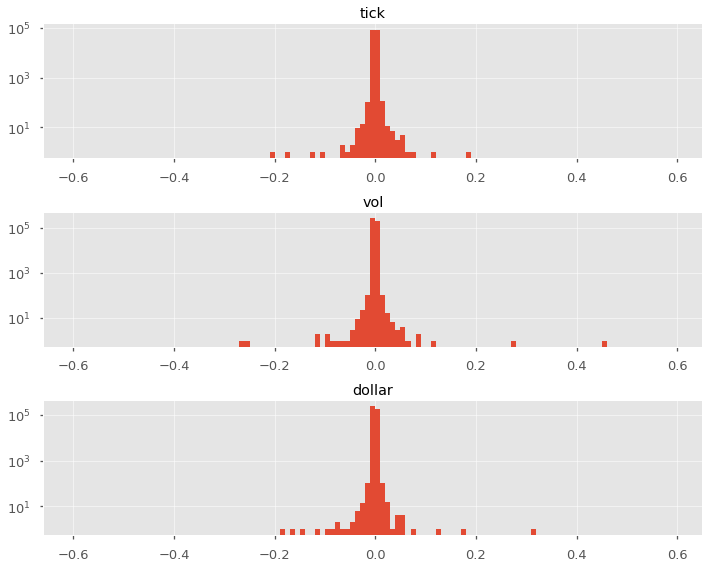

In [58]:
bins = np.arange(-0.6,0.6,0.01)
fig, ax = plt.subplots(3,1)
ax[0].hist(tick_returns, bins=bins)
ax[0].set_title('tick')
ax[1].hist(vol_returns, bins=bins)
ax[1].set_title('vol')
ax[2].hist(dollar_returns, bins=bins)
ax[2].set_title('dollar')
[a.set_yscale('log') for a in ax]
fig.tight_layout()
plt.savefig('./images/serial_corr_bars.png')

**Plot the Autocorrelation functiono**

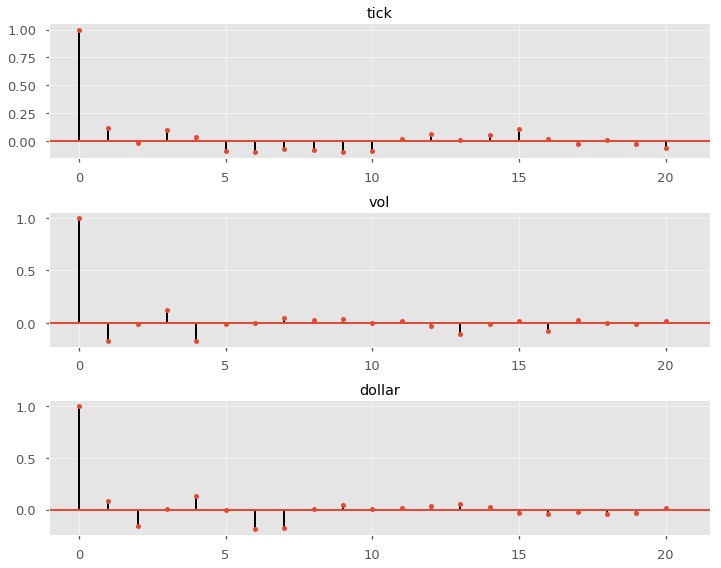

In [59]:
import statsmodels.api as sm
fig, ax = plt.subplots(3,1)
sm.graphics.tsa.plot_acf(tick_returns, lags=20, ax=ax[0], title='tick')
sm.graphics.tsa.plot_acf(vol_returns, lags=20, ax=ax[1], title='vol')
sm.graphics.tsa.plot_acf(dollar_returns, lags=20, ax=ax[2], title='dollar')
fig.tight_layout()

**(d)** Partition the bar series into monthly subsets. Compute the variance of returns for every subset of every bar type. Compute the variance of those variances. What method exhibits the smallest variance of variances?

In [28]:
#monthly_ticks_returns_var = tick_returns.resample('M').var()
monthly_tick_returns_var = tick_returns.resample('M').var()
monthly_vol_returns_var = vol_returns.resample('M').var()
monthly_dollar_retuns_var = dollar_returns.resample('M').var()

In [29]:
monthly_ret_var_df = pd.DataFrame(data={'monthly_returns_var' : [monthly_tick_returns_var.var(),  
                                                                 monthly_vol_returns_var.var(),
                                                                 monthly_dollar_retuns_var.var()]
                                       },
                                  index=['tick', 'vol', 'dollar'])
monthly_ret_var_df

,monthly_returns_var
tick,6.799775e-11
vol,7.809432e-11
dollar,6.030135e-11


**(e)** Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

In [69]:
from scipy.stats import jarque_bera

In [70]:
jb_value_tick, _ = jarque_bera(tick_returns)
jb_value_vol, _ = jarque_bera(vol_returns)
jb_value_dollar, _ = jarque_bera(dollar_returns)

In [71]:
jb_test_df = pd.DataFrame(data={'jarque_bera_results' : [jb_value_tick,  
                                                         jb_value_vol,
                                                         jb_value_dollar]
                               }, index=['tick', 'vol', 'dollar'])
jb_test_df

,jarque_bera_results
tick,1.195019e+11
vol,3.873030e+13
dollar,7.664635e+12


All the comparations

In [33]:
pd.concat([count_df, returns_corr_df, monthly_ret_var_df, jb_test_df],axis=1)

,count_mean,count_std,returns_autocorr,monthly_returns_var,jarque_bera_results
tick,317.515,193.028,0.116565,6.799775e-11,1.195019e+11
vol,905.638,532.047,-0.168050,7.809432e-11,3.873030e+13
dollar,806.258,556.688,0.086624,6.030135e-11,7.664635e+12


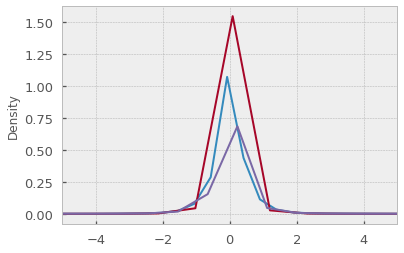

In [34]:
tick_standard = (tick_returns - tick_returns.mean()) / tick_returns.std()
volume_standard = (vol_returns - vol_returns.mean()) / vol_returns.std()
dollar_standard = (dollar_returns - dollar_returns.mean()) / dollar_returns.std()

fig, ax = plt.subplots(1,1)
tick_standard.plot.density(ax=ax,
                           xlim=(-5,5))
volume_standard.plot.density(ax=ax,
                             xlim=(-5,5))
dollar_standard.plot.density(ax=ax,
                             xlim=(-5,5))
plt.savefig('./images/tick_volume_dollar_densities.png')

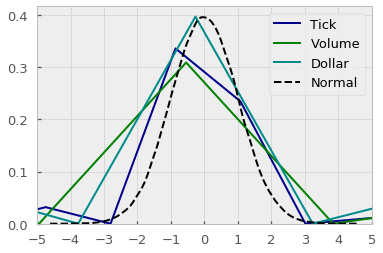

In [35]:
import seaborn as sns

fig, ax = plt.subplots()
#sns.kdeplot(time_standard, label="Time", bw=0.30, color='darkred')
sns.kdeplot(tick_standard, 
            ax=ax,
            label="Tick", 
            bw=0.25,
            color='darkblue')
sns.kdeplot(volume_standard,
            ax=ax,
            label="Volume",
            bw=0.25,
            color='green')
sns.kdeplot(dollar_standard,
            ax=ax,
            label="Dollar",
            bw=0.25,
            linewidth=2,
            color='darkcyan')
sns.kdeplot(np.random.normal(size=len(tick_standard)),
            ax=ax,
            label="Normal",
            color='black',
            linestyle="--")
ax.set_xticks(range(-5, 6))
ax.set_xlim(-5, 5)
plt.savefig('./images/normal_compare.png')

___

**2.2** On a series of E-mini S&P 500 futures tick data, compute dollar bars
and dollar imbalance bars. What bar type exhibits greater serial correlation?
Why?

In [36]:
# implement dollar imbalance bars

___

**2.3** On dollar bar series of E-mini S&P 500 futures and Eurostoxx 50 futures:
- **(a)** Apply Section 2.4.2 to compute the {$\hat{\omega}_t$} vector used by the ETF trick. (Hint: You will need FX values for EUR/USD at the roll dates.)
- **(b)** Derive the time series of the S&P 500/Eurostoxx 50 spread.
- **(c)** Confirm that the series is stationary, with an ADF test.

In [37]:
# 

___

**2.4** Form E-mini S&P 500 futures dollar bars:
- **(a)** Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).
- **(b)** Now sample those bars using a CUSUM filter, where {$y_t$} are returns and h = 0.05. How many samples do you get?
- **(c)** Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?

**(a)** Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).

In [39]:
m = 100_000
dollar_df = ml.dollar_bar(df, m)

Traditional Bollinger Bands consist of a N-period moving average (MA), an upper band at K times an N-period standard deviation  above the moving average (MA + Kσ) and a lower band at K times an N-period standard deviation below the moving average (MA − Kσ). , a typical values for N and K are 20 and 2

In [40]:
N = 20
K = 2
ma = dollar_df.price.rolling(N).mean()
sigma = dollar_df.price.rolling(N).std()
upper_band = ma + K*sigma
lower_band = ma - K*sigma

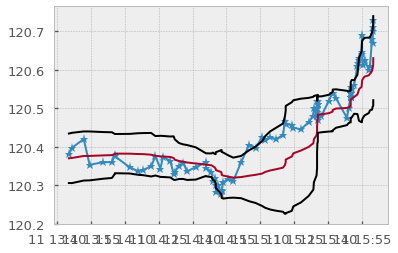

In [41]:
fig, ax = plt.subplots(1)
plt.plot(dollar_df.iloc[-100:].price, marker='*')
plt.plot(ma.iloc[-100:])
plt.plot(upper_band.iloc[-100:], color='k')
plt.plot(lower_band.iloc[-100:], color='k')
plt.savefig('./images/bollinger_bands.png')

The exercise says compute Bollinger bands of width 5% around a rolling moving average. 

In [42]:
N = 20
ma = dollar_df.price.rolling(N).mean()
price_pct = 0.001
upper_band = ma + ma*price_pct
lower_band = ma - ma*price_pct
bb_dataframe = pd.concat([dollar_df.price, ma, upper_band, lower_band], axis=1).dropna()
bb_dataframe.columns=['price','ma','upper_band','lower_band']

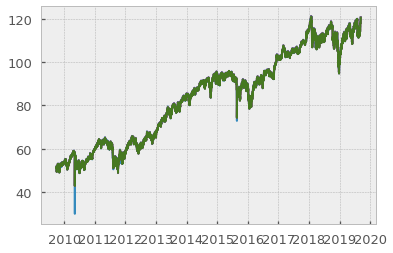

In [43]:
fig, ax = plt.subplots(1)
plt.plot(bb_dataframe) # color=['b','r', 'k', 'k']
plt.savefig('./images/bollinger_2.png')

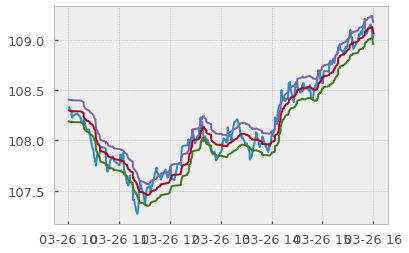

In [44]:
s_date='2018-03-26 10'
e_date='2018-03-26 16'

fig, ax = plt.subplots(1)
plt.plot(bb_dataframe.loc[s_date:e_date]) # color=['b','r', 'k', 'k']
plt.savefig('./images/bollinger_3.png')

Count how many times prices cross the bands out (from within the bands to outside the bands).

In [45]:
dollar_df[dollar_df.price > upper_band].shape

(75328, 6)

In [46]:
dollar_df[dollar_df.price < lower_band].shape  

(72816, 6)

In [47]:
def get_up_cross(df):
    crit1 = df.price.shift(1) < df.upper_band.shift(1)  
    crit2 = df.price > df.upper_band
    return df.price[(crit1) & (crit2)]

def get_down_cross(df): 
    crit1 = df.price.shift(1) > df.lower_band.shift(1) 
    crit2 = df.price < df.lower_band
    return df.price[(crit1) & (crit2)]

bb_down = get_down_cross(bb_dataframe)
bb_up = get_up_cross(bb_dataframe) 

In [48]:
bb_down.shape

(12851,)

In [49]:
bb_up.shape

(13210,)

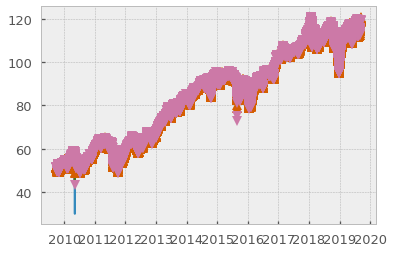

In [50]:
fig, ax = plt.subplots(1)
plt.plot(bb_dataframe) #color=['b','r', 'k', 'k'])
plt.plot(bb_up, marker='^', ms=10, ls='')
plt.plot(bb_down, marker='v', ms=10, ls='')
plt.savefig('./images/bollinger_4.png')

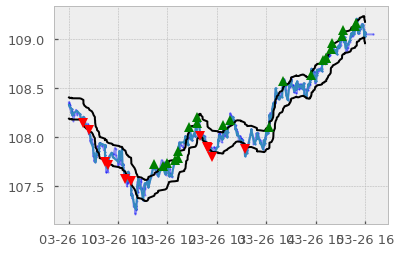

In [51]:
s_date='2018-03-26 10'
e_date='2018-03-26 16'

fig, ax = plt.subplots(1)
plt.plot(df.loc[s_date:e_date].price, color='b', marker='o', alpha=0.4, ms=2)

plt.plot(bb_dataframe.loc[s_date:e_date].price, marker='o', ms=2)
plt.plot(bb_dataframe.loc[s_date:e_date].upper_band, color='k')
plt.plot(bb_dataframe.loc[s_date:e_date].lower_band, color='k')
plt.plot(bb_up.loc[s_date:e_date], color='g', marker='^', ms=10, ls='')
plt.plot(bb_down.loc[s_date:e_date], color='r', marker='v', ms=10, ls='')
plt.savefig('./images/bollinger_5.png')

___

**2.5** Using the bars from exercise 4:
- **(a)** Sample bars using the CUSUM filter, where {$y_t$} are absolute returns and h = 0.05.
- **(b)** Compute the rolling standard deviation of the sampled bars.
- **(c)** Compare this result with the results from exercise 4. What procedure delivered the least heteroscedastic sample? Why?